In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import Image
import pandas as pd

from greatbrowser import great_get_options, great_analysis, great_global_controls
bed_data = pd.read_excel('main/src/sample_bed_data.xlsx')
bed_data.columns = ['chr', 'start', 'end']
bed_data

,chr,start,end
0,chr1,4748088,4748507
1,chr1,4768378,4780503
2,chr1,4848009,4848547
3,chr1,5046471,5046985
4,chr1,5146655,5146913
...,...,...,...
324,chr1,51570334,51600876
325,chr1,51614863,51626735
326,chr1,51644387,51644755
327,chr1,51669990,51670401


In [2]:
#show the available global control options
great_global_controls()

#get dataset with all useable input columns
bed_data_2 = pd.read_excel('main/src/sample_bed_data_2.xlsx')
bed_data_2

Global Control Keys: Input = GREAT Label:

minFold = Minimum Region-based Fold Enrichment:	int
n_gene_hits or minAnnotFgHitGenes = Observed Gene Hits:	 int
filterText = Term Name Filter:	str
allMinAC = Term Annotation Count Min:	int
allMaxAC = Term Annotation Count Max:	int
sigValue = Statistical Significance Threshhold:	float
view = Significance view:	viewSigByBoth, viewSigByRegion, viewFull


,chr,chromStart,chromEnd,name,score,strand,thickStart,thickEnd
0,chr7,127471196,127472363,Pos1,0,+,127471196,127472363
1,chr7,127472363,127473530,Pos2,0,+,127472363,127473530
2,chr7,127473530,127474697,Pos3,0,+,127473530,127474697
3,chr7,127474697,127475864,Pos4,0,+,127474697,127475864
4,chr7,127475864,127477031,Neg1,0,-,127475864,127477031
5,chr7,127477031,127478198,Neg2,0,-,127477031,127478198
6,chr7,127478198,127479365,Neg3,0,-,127478198,127479365
7,chr7,127479365,127480532,Pos5,0,+,127479365,127480532
8,chr7,127480532,127481699,Neg4,0,-,127480532,127481699


In [3]:
#show the available 'get=' parameter options
great_get_options()

"get" Parameter Options:

get = genes 	 returns a dataframe of the inputted data + genes associated with each probe. For large datasets, run multiple iterations and merge dataframes post-hoc using pd.concat
get = ucsc_browser 	 opens ucsc genome browser for the inputted data
get = genes_pivot 	 same as genes, but grouped by gene rather than region
get = n_genes_region 	 saves a barplot showing the number of region with x gene associations, grouped by x, as a png
get = n_genes_TSS 	 saves a batplot showing the distance between each probe/gene pair, grouped by kilobases, as a png
get = n_genes_abs_TSS 	 same as n_genes_TSS but with absolute value being used for distance

The below options all additionally save a png if plot=bar (barplot) or plot=hierarchy (hierarchy plot) (default=False)

get = ensembl_genes 	 returns a dataframe of the Ensembl genes processes associated with the probe set
get = go_process 	 returns a dataframe of the GO biological processes associated with the probe set

In [4]:
#get genes associated with each individual input. You can use a dataframe, path, numpy array or list as input. 
#The index/name column must NOT contain any + or - symbols, as these are used to differentiate genes from indices/names
%autoreload 2
gene_df = great_analysis(test_regions=bed_data, get='genes', assembly='hg38', #show the desire output  set the desired assembly
                         is_formatted=False,#is the input already properly formatted with headers? Requires either dataframe or path for this, and chr -> index col must be included.
                         df_start='start', df_end='end', df_index='name', df_chr='chr') #set names of corresponding columns in df
gene_df

,chr,start,end,name,associated_genes
0,chr1,4748088,4748507,0,[]
1,chr1,4768378,4780503,1,"[AJAP1 (+93,253)]"
2,chr1,4848009,4848547,2,"[AJAP1 (+119,396)]"
3,chr1,5046471,5046985,3,"[AJAP1 (+193,233)]"
4,chr1,5146655,5146913,4,"[AJAP1 (+391,683), NPHP4 (+945,743)]"
...,...,...,...,...,...
324,chr1,51570334,51600876,324,"[EPS15 (-4,734)]"
325,chr1,51614863,51626735,325,"[EPS15 (-66,277), OSBPL9 (-31,487)]"
326,chr1,51644387,51644755,326,"[OSBPL9 (+3,707), NRDC (+258,006)]"
327,chr1,51669990,51670401,327,"[OSBPL9 (+27,479), NRDC (+234,234)]"


In [5]:
#get the same as the above cell, but sorted by gene, but without the unneeded parameter declerations
gene_pvt_df = great_analysis(test_regions=bed_data, get='genes_pivot', assembly='hg38', df_index='name') 
gene_pvt_df

,genes,ids
0,ACOT7,"8 (-26,400), 7 (+2,826), 6 (+113,392)"
1,ADPRHL2,"168 (+13,392)"
2,AGMAT,"65 (+40,649)"
3,AGO1,"160 (-66,307), 161 (-40,082), 162 (-21,481), 1..."
4,AGO3,"163 (-40,664), 164 (+4,214), 165 (+46,490), 16..."
...,...,...
212,ZMPSTE24,"259 (+5,334), 260 (+12,220), 261 (+32,658), 26..."
213,ZNF436,"108 (-30,328)"
214,ZNF684,"269 (-7,971), 270 (+13,276)"
215,ZNF691,"273 (+68,669)"


In [6]:
#get the outputted ensembl genes
hg_df = great_analysis(test_regions=bed_data, get='human_phenotype', assembly='hg38', is_formatted=False, df_index='name', headless=False) #headless=False shows the browser
hg_df

No results meet your chosen criteria.


In [7]:
#get the outputted mouse knockout phenotypes
mm_ko_df = great_analysis(test_regions=bed_data, get='mouse_phenotype_KO', assembly='hg38', is_formatted=False, df_index='name')
mm_ko_df

,term_name,go_annotation,binom_rank,binom_raw_pval,binom_bonferroni_pval,binom_fdr_qval,binom_fold_enrichment,binom_expected,binom_obs_region_hits,binom_genome_fraction,...,hyper_rank,hyper_raw_pval,hyper_bonferroni_pval,hyper_fdr_qval,hyper_fold_enrichment,hyper_expected,hyper_obs_gene_hits,hyper_total_genes,hyper_gene_set_coverage,hyper_term_gene_coverage
0,decreased monocyte cell number,MP:0000223,4,2.6220e-26,2.4010e-22,6.0025e-23,12.5799,2.7027,34,0.0082,...,5,6.7881e-15,6.2158e-11,1.2432e-11,13.6205,1.2481,17,108,7.83%,15.74%
1,abnormal monocyte cell number,MP:0012441,13,1.4053e-17,1.2868e-13,9.8986e-15,6.2903,5.5641,35,0.0169,...,7,4.7665e-11,4.3646e-7,6.2352e-8,7.3817,2.4385,18,211,8.29%,8.53%
2,abnormal monocyte morphology,MP:0002620,15,3.1986e-17,2.9290e-13,1.9527e-14,6.1204,5.7186,35,0.0174,...,8,7.0303e-11,6.4377e-7,8.0471e-8,7.2108,2.4962,18,216,8.29%,8.33%
3,abnormal NMDA-mediated synaptic currents,MP:0002888,34,3.6177e-12,3.3127e-8,9.7433e-10,19.1322,0.6272,12,0.0019,...,17,4.6752e-5,4.2811e-1,2.5183e-2,19.2289,0.2080,4,18,1.84%,22.22%
4,increased Ly6C high monocyte number,MP:0013022,61,4.1780e-10,3.8258e-6,6.2717e-8,14.8043,0.7430,11,0.0023,...,1,9.3039e-19,8.5196e-15,8.5196e-15,34.6120,0.4045,14,35,6.45%,40.00%
5,decreased Ly6C low monocyte number,MP:0013026,75,5.0323e-9,4.6081e-5,6.1441e-7,11.6150,0.9470,11,0.0029,...,2,1.2130e-16,1.1107e-12,5.5537e-13,25.7749,0.5432,14,47,6.45%,29.79%
6,abnormal Ly6C high monocyte number,MP:0013021,99,1.0250e-7,9.3859e-4,9.4807e-6,8.5991,1.2792,11,0.0039,...,3,5.9699e-16,5.4666e-12,1.8222e-12,23.2965,0.6009,14,52,6.45%,26.92%
7,abnormal Ly6C low monocyte number,MP:0013024,103,1.2878e-7,1.1792e-3,1.1449e-5,8.4024,1.3092,11,0.0040,...,4,1.4252e-15,1.3050e-11,3.2626e-12,22.0258,0.6356,14,55,6.45%,25.45%
8,abnormal mononuclear phagocyte morphology,MP:0008248,133,1.3508e-6,1.2370e-2,9.3004e-5,2.3396,16.2424,38,0.0494,...,14,4.1634e-6,3.8124e-2,2.7231e-3,3.2408,6.1713,20,534,9.22%,3.75%
9,abnormal phagocyte morphology,MP:0008251,159,8.1722e-6,7.4833e-2,4.7065e-4,2.0637,20.3516,42,0.0619,...,18,5.3349e-5,4.8852e-1,2.7140e-2,2.6335,7.9741,21,690,9.68%,3.04%


PNG image downloaded successfully as 'mouse_phenotype_KO_hierarchy_plot.png'


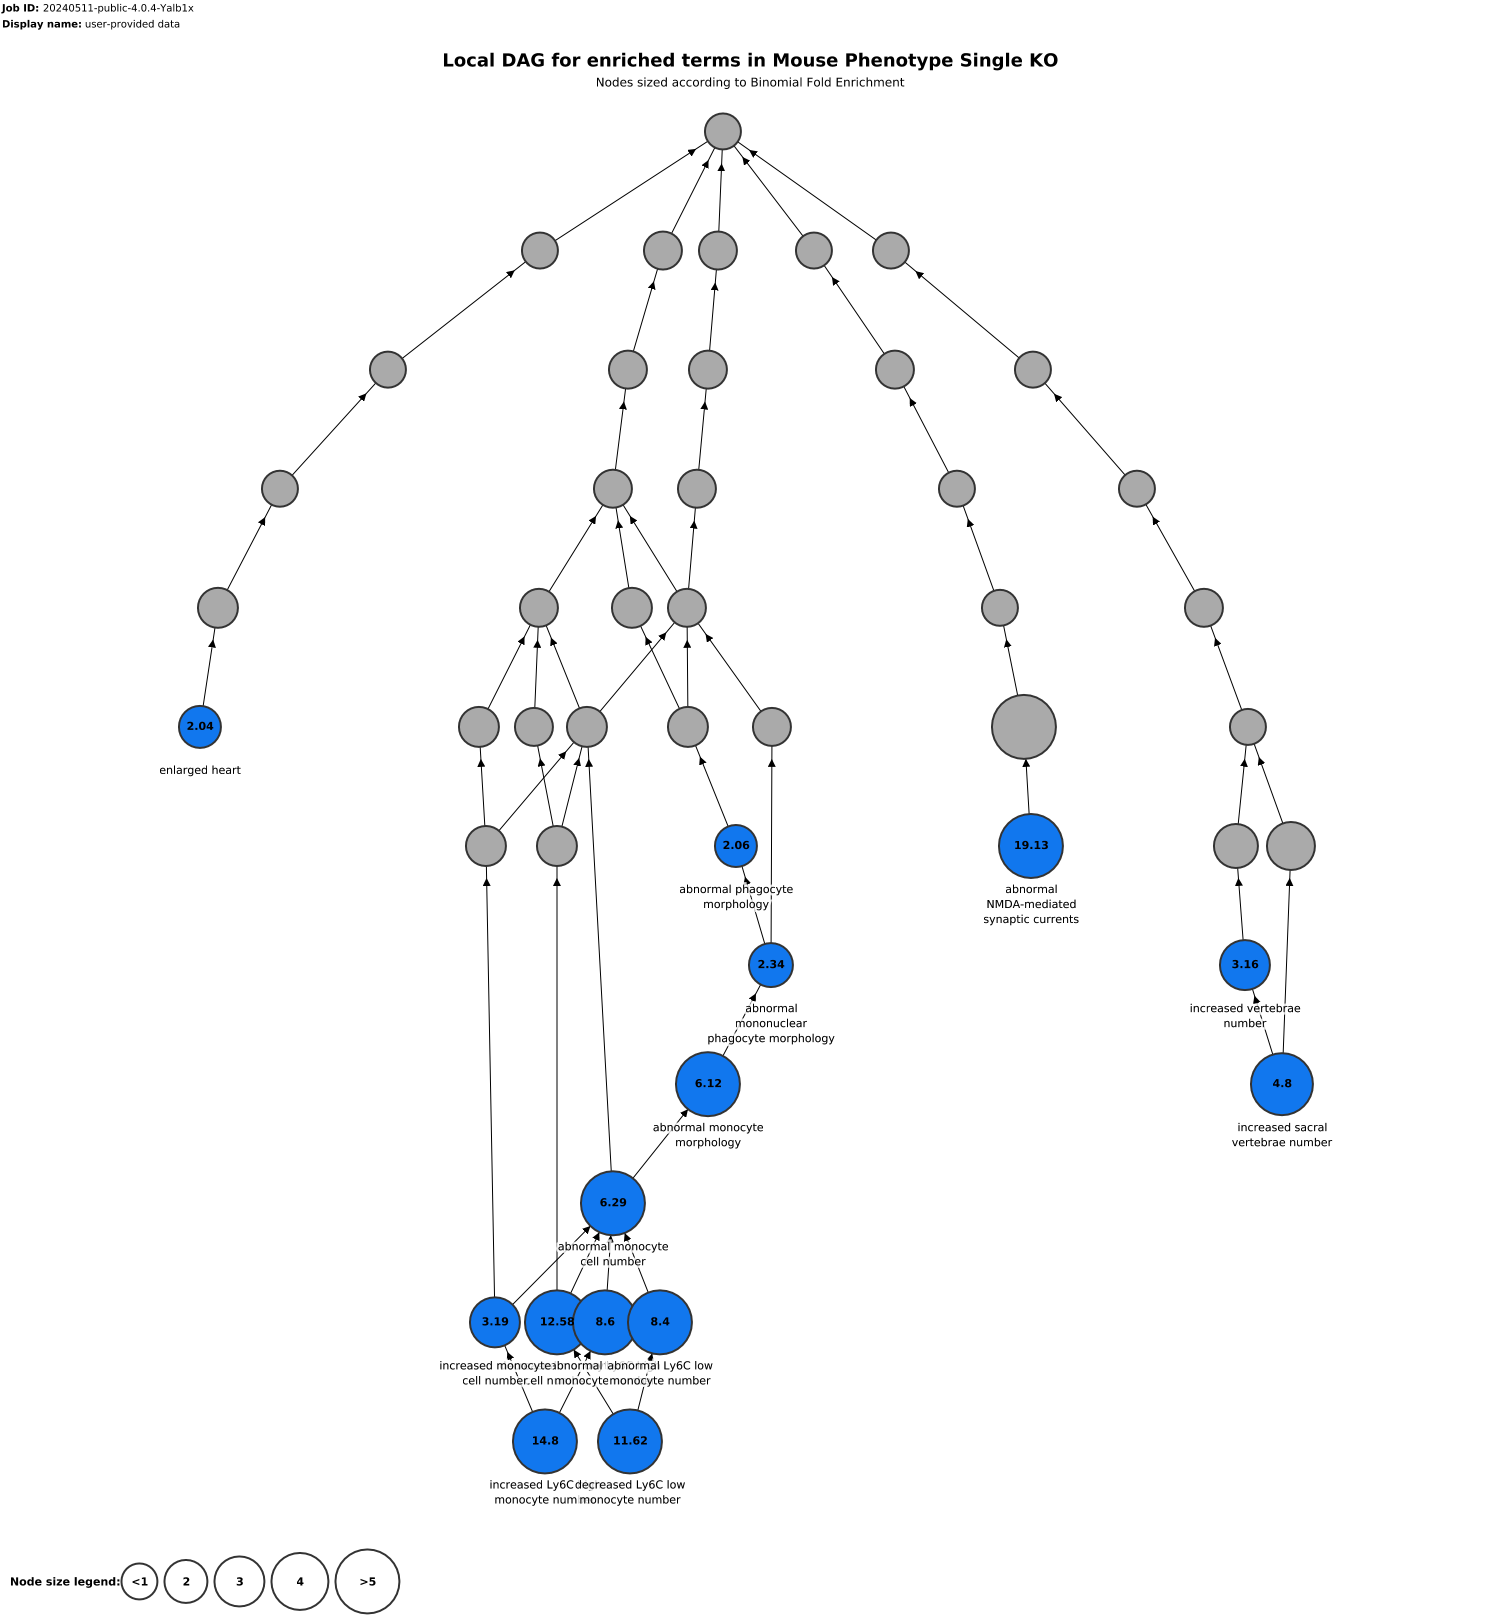

In [8]:
#plot the mouse phenotype KO using GREATs built in functionality, and save the file
mm_ko_df = great_analysis(test_regions=bed_data, get='mouse_phenotype_KO', assembly='hg38', is_formatted=False, df_index='name', plot='hierarchy')

Image(filename='mouse_phenotype_KO_hierarchy_plot.png') 

PNG image downloaded successfully as 'the_bar.png'


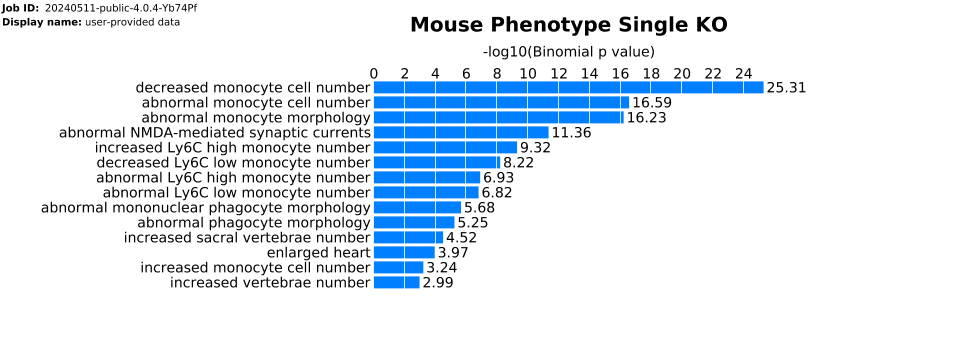

In [9]:
#tweak the global controls and other settings to specify which criteria you want to use for analysis
mm_ko_df2 = great_analysis(test_regions=bed_data, get='mouse_phenotype_KO', assembly='hg38', 
                           is_formatted=False, df_index='name', plot='bar', assoc_criteria='two_closest', #use two closest genes for associations
                           file_name='the_bar', global_controls = {'sigValue' : 0.01}) #custom file name and settings, pval thresh = 0.01

Image(filename='the_bar.png') 

In [10]:
#add background regions, and tweak some more settings
mm_ko_df2 = great_analysis(test_regions=bed_data[:80], background_regions=bed_data, get='mouse_phenotype_KO', assembly='hg38', #use background regions
                           is_formatted=False, df_index='name', assoc_criteria='one_closest', #use closest gene for associations
                           global_controls = {'view' : 'viewSigByRegion'}, #change significance criteria for tables
                           df_strand='hollywood', file_name='millionaire') #irrelevant parameter definitions are ignored
mm_ko_df2

,term_name,go_annotation,binom_rank,binom_raw_pval,binom_bonferroni_pval,binom_fdr_qval,binom_fold_enrichment,binom_expected,binom_obs_region_hits,binom_genome_fraction,...,hyper_rank,hyper_raw_pval,hyper_bonferroni_pval,hyper_fdr_qval,hyper_fold_enrichment,hyper_expected,hyper_obs_gene_hits,hyper_total_genes,hyper_gene_set_coverage,hyper_term_gene_coverage
0,abnormal tail morphology,MP:0002111,1,2.1982e-8,2.0129e-4,2.0129e-4,4.1125,2.9179,12,12,...,100.00%,9,9,359,limbs/digits/tail phenotype,MP:0005371,2,8.9057e-7,8.1550e-3,4.0775e-3
1,2.9909,5.3495,16,22,20.00%,72.73%,11,14,906,abnormal sacral vertebrae morphology,...,3,2.0808e-6,1.9054e-2,6.3514e-3,4.1125,2.1885,9,9,11.25%,100.00%
2,8,8,143,increased vertebrae number,MP:0004644,3,2.0808e-6,1.9054e-2,6.3514e-3,4.1125,...,9,9,11.25%,100.00%,8,8,130,increased sacral vertebrae number,MP:0010101,3
3,2.0808e-6,1.9054e-2,6.3514e-3,4.1125,2.1885,9,9,11.25%,100.00%,8,...,103,abnormal Ly6C high monocyte number,MP:0013021,3,2.0808e-6,1.9054e-2,6.3514e-3,4.1125,2.1885,9
4,9,11.25%,100.00%,8,8,52,increased Ly6C high monocyte number,MP:0013022,3,2.0808e-6,...,6.3514e-3,4.1125,2.1885,9,9,11.25%,100.00%,8,8,35
5,abnormal Ly6C low monocyte number,MP:0013024,3,2.0808e-6,1.9054e-2,6.3514e-3,4.1125,2.1885,9,9,...,100.00%,8,8,55,decreased Ly6C low monocyte number,MP:0013026,3,2.0808e-6,1.9054e-2,6.3514e-3
6,4.1125,2.1885,9,9,11.25%,100.00%,8,8,47,skeleton phenotype,...,10,2.6408e-6,2.4182e-2,2.4182e-3,2.3070,9.9696,23,41,28.75%,56.10%
7,14,25,"1,970",abnormal mineral level,MP:0000192,11,9.2771e-6,8.4950e-2,7.7227e-3,4.1125,...,8,8,10.00%,100.00%,2,2,466,abnormal circulating sodium level,MP:0001776,11
8,9.2771e-6,8.4950e-2,7.7227e-3,4.1125,1.9453,8,8,10.00%,100.00%,2,...,111,increased circulating sodium level,MP:0005633,11,9.2771e-6,8.4950e-2,7.7227e-3,4.1125,1.9453,8
9,8,10.00%,100.00%,2,2,88,abnormal mineral homeostasis,MP:0005636,11,9.2771e-6,...,7.7227e-3,4.1125,1.9453,8,8,10.00%,100.00%,2,2,477


Image saved as n_genes_region.png in /Users/samanderson/Desktop/greatbrowser (github)


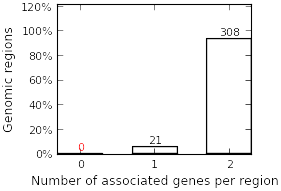

In [11]:
#if using a path, need to include column headers in the first row of source file

'''VVV Doesnt work VVV'''
#mm_ko_df2 = great_analysis(test_regions='sample_bed_data.xlsx')
'''^^^ Doesnt work ^^^'''

temp = pd.read_excel('main/src/sample_bed_data.xlsx')
temp.columns = ['chr', 'start', 'end']
temp.to_excel('sample_bed_data_1a.xlsx', index=False)

#get the number of genes per region
n_genes_region_df = great_analysis(test_regions='sample_bed_data_1a.xlsx', is_formatted=True, get='n_genes_region', assembly='hg38')

Image(filename='n_genes_region.png') 

Image saved as n_genes_abs_TSS.png in /Users/samanderson/Desktop/greatbrowser (github)


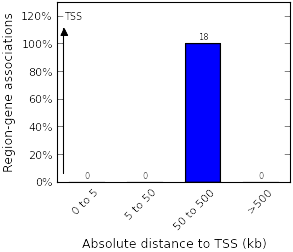

In [12]:
#another example, this time changing the header title associated with df_start and df_end
n_genes_region_df = great_analysis(test_regions='sample_bed_data_2.xlsx', is_formatted=False, df_start='chromStart',
                                   	df_end='chromEnd', get='n_genes_abs_TSS', assembly='hg38')
Image(filename='n_genes_abs_TSS.png') 